# EDA
- Loading the libraries and the data

In [1]:
import pandas as pd
import numpy as np
from DateTime import DateTime
import matplotlib.pyplot as plt
import plotly.graph_objects as go


- Transformation of the data to begin the EDA
- For a matter of effiency, the analisis is going to be only with the Close/Last value
    - If it is necessary, the opening value is going to be added

In [2]:
df= pd.read_csv('../Data/apple.csv',sep=',',encoding='utf-8')                       # Reading the data
df= df[['Date','Close/Last']]                                                       # Only taking Date and Close values
df['Close/Last']=df['Close/Last'].str.replace('$','',regex=False).astype(float)     # Replacing the $ value
df['Date']= pd.to_datetime(df['Date'])                                              # To datetime
df.sort_values(by='Date',inplace=True)                                              
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.set_index('Date',inplace=True)


- in this Analysis, we can see the change in the value of the price in the last 10 years, the is a considerable change in the scale from 2021 and 2022, lets begin an analysis from 2014, later on iterate over that same proces from 2021,2022 an finally in 2023
We can see that there is a very considerable trend and pattern from 2023, later on we are going to analyze more of those points

- Visualization of all the values trough time

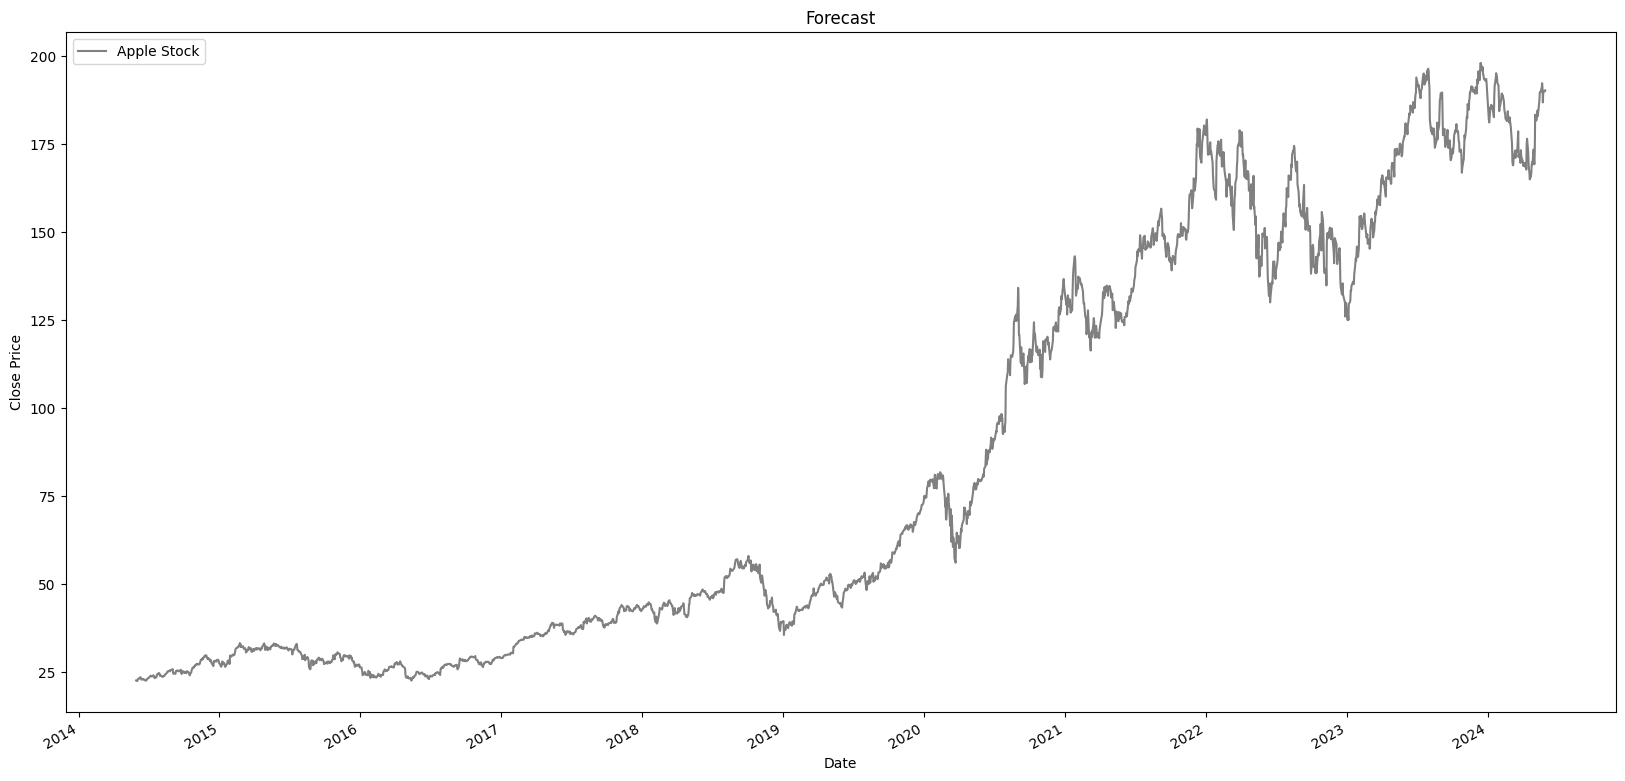

In [65]:
df["Close/Last"].plot(figsize=(20, 10), label="Apple Stock", color= "gray")
plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


- In this Data, we are going to create segments to analyze some pikes/patterns in the data

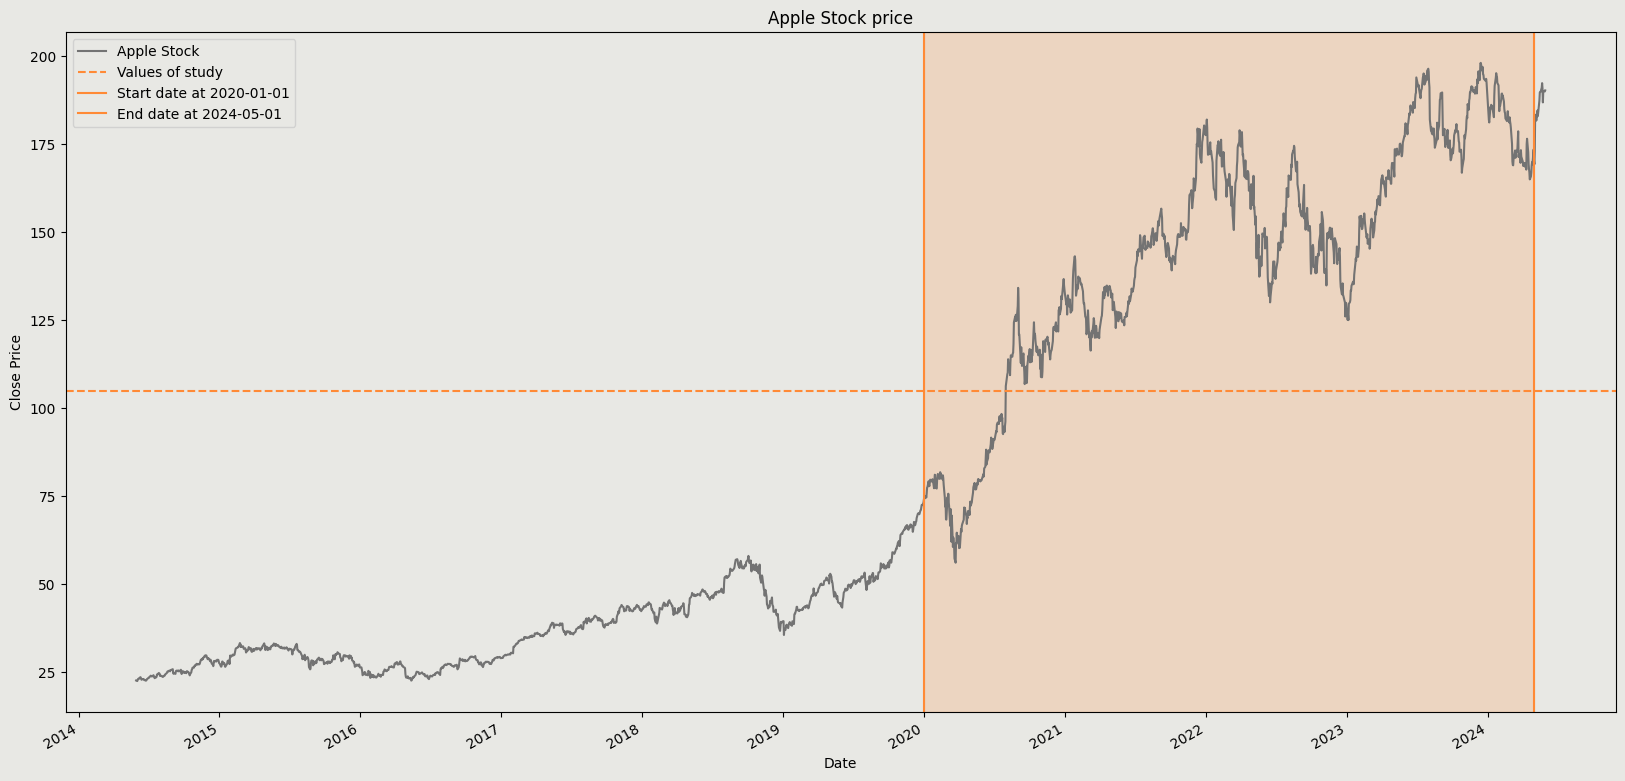

In [4]:
df["Close/Last"].plot(figsize=(20, 10), label="Apple Stock", color= "#737373")                                      # Selection of data
plt.axhline(y=105, color='#FF8A36', linestyle='--', label='Values of study')
#plt.axhspan(105, 170, color='orange', alpha=0.1)  

plt.axvline(x=pd.to_datetime('2020-01-01'), color='#FF8A36', linestyle='-', label='Start date at 2020-01-01')
plt.axvline(x=pd.to_datetime('2024-05-01'), color='#FF8A36', linestyle='-', label='End date at 2024-05-01')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-05-01'), color='#FF8A36', alpha=0.2)

plt.title("Apple Stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.show()

In [5]:
start_date = "2020-01-01"
end_date = "2024-05-01"

window_1= df[(df.index>=start_date)&(df.index<=end_date)].copy()

In [6]:
window_1.rename(columns={"Close/Last":"Value"},inplace=True)

In [8]:
print(window_1.head(2))
print(window_1.tail(2))

              Value
Date               
2020-01-02  75.0875
2020-01-03  74.3575
             Value
Date              
2024-04-30  170.33
2024-05-01  169.30


In [29]:
minimmum= window_1["Value"].idxmin()
min_value= window_1.loc[minimmum]
print(min_value)
print(minimmum.day_name())

Value    56.0925
Name: 2020-03-23 00:00:00, dtype: float64
Monday


- To double check the moment where the Vale got at is highest

In [64]:
max_value= window_1["Value"].idxmax()
max_observation= window_1.loc[max_value]
print(max_observation)
print(max_value.day_name())

Value    198.11
Name: 2023-12-14 00:00:00, dtype: float64
Thursday


- Windows to analyze the charasteristics of the growth

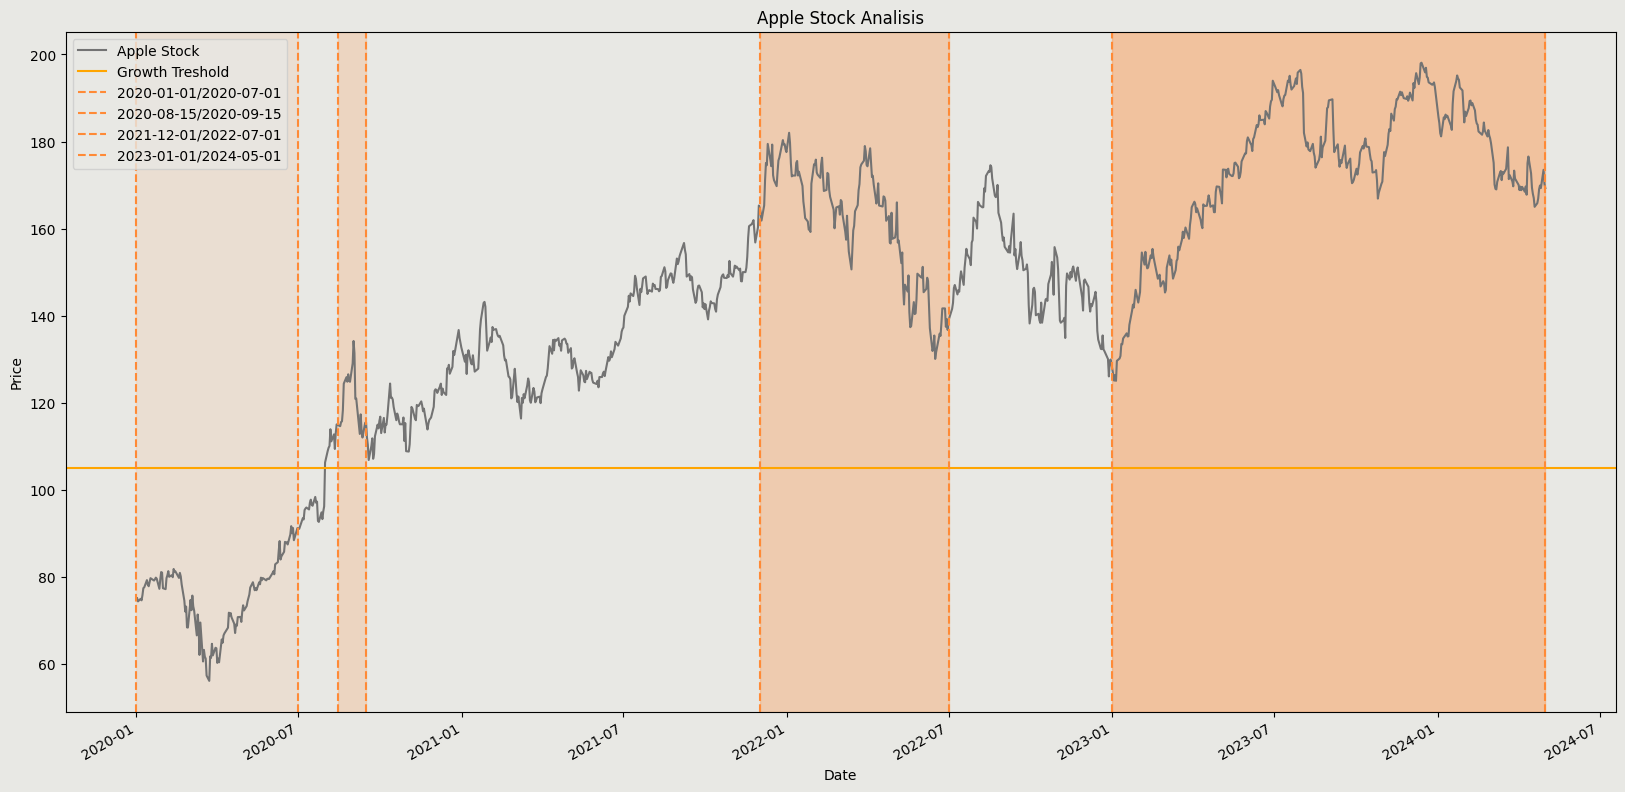

In [70]:

window_1["Value"].plot(figsize=(20,10),label="Apple Stock",color="#737373")
plt.axhline(y=105, color="orange", linestyle="-",label="Growth Treshold")

plt.axvline(x=pd.to_datetime("2020-01-01"),color="#FF8A36",linestyle="--",label="2020-01-01/2020-07-01")
plt.axvline(x=pd.to_datetime("2020-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01"),color="#FF8A36",alpha=0.1)


plt.axvline(x=pd.to_datetime("2020-08-15"),color="#FF8A36",linestyle="--",label="2020-08-15/2020-09-15")
plt.axvline(x=pd.to_datetime("2020-09-15"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-08-15"),pd.to_datetime("2020-09-15"),color="#FF8A36",alpha=0.2)

plt.axvline(x=pd.to_datetime("2021-12-01"),color="#FF8A36",linestyle="--",label="2021-12-01/2022-07-01")
plt.axvline(x=pd.to_datetime("2022-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2021-12-01"),pd.to_datetime("2022-07-01"),color="#FF8A36",alpha=0.3)

plt.axvline(x=pd.to_datetime("2023-01-01"),color="#FF8A36",linestyle="--",label="2023-01-01/2024-05-01")
plt.axvline(x=pd.to_datetime("2024-05-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2023-01-01"),pd.to_datetime("2024-05-01"),color="#FF8A36",alpha=0.4)


plt.title("Apple Stock Analisis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(facecolor="#E8E8E4")
plt.show()